In [5]:
import PIL as p
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, MiniBatchKMeans
from google.colab import files
from io import BytesIO
from PIL import Image

In [6]:
height = 800
length = 1200

# old_img = p.Image.open('/content/drive/MyDrive/Colab Notebooks/cat.jpg')
upl = files.upload()
old_img = Image.open(BytesIO(upl['img.jpg']))
print(f'The init size of image: {old_img.size}, new size: {length, height}')
# old_img = p.Image.open('C:\\Users\\vikto\\Downloads\\cat.jpg')
old_img = old_img.resize((length, height))

KeyError: ignored

(-0.5, 1199.5, 799.5, -0.5)

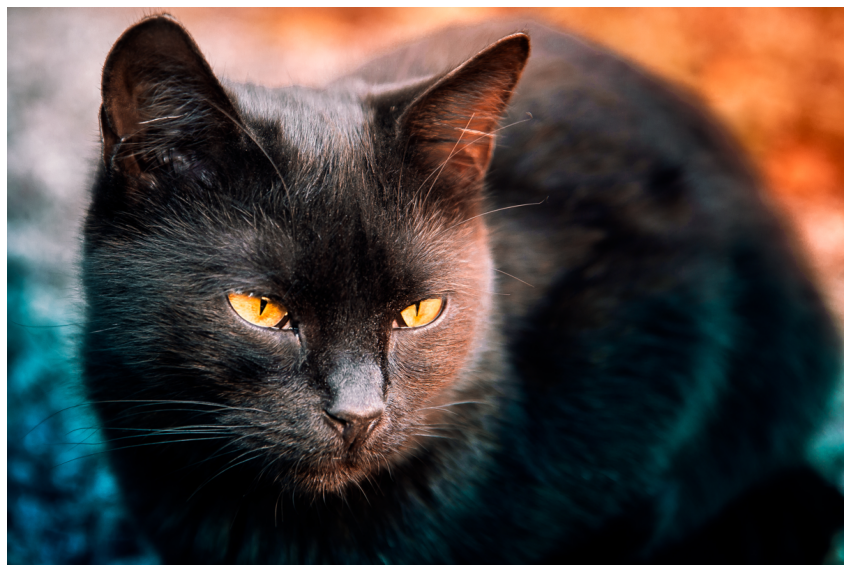

In [35]:
plt.figure(figsize=(15, 15))
plt.imshow(old_img)
plt.axis('off')

In [36]:
img = np.array(old_img)
old_shape = img.shape
img = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
print(f'Old shape: {old_shape}, new shape: {img.shape}')

Old shape: (800, 1200, 3), new shape: (960000, 3)


In [37]:
clusters = 6 # Количество цветов

# clt = KMeans(n_clusters=clusters, init='k-means++', random_state=42).fit(img)
clt = MiniBatchKMeans(n_clusters=clusters, random_state=42).fit(img)

In [38]:
centers = np.array(clt.cluster_centers_, dtype=int)
print(centers.shape)

(6, 3)


In [39]:
cluster_img = np.array(clt.predict(img), dtype=object)
cluster_img = cluster_img.reshape((height, length))
print(cluster_img.shape)

(800, 1200)


In [40]:
end_img = np.random.rand(height, length, 3)
print(end_img.shape)

(800, 1200, 3)


In [41]:
for i in range(height):
    for j in range(length):
        end_img_pixel = centers[cluster_img[i, j]]
        end_img[i, j] = end_img_pixel
end_img = np.array(end_img, dtype=int)

(-0.5, 1199.5, 799.5, -0.5)

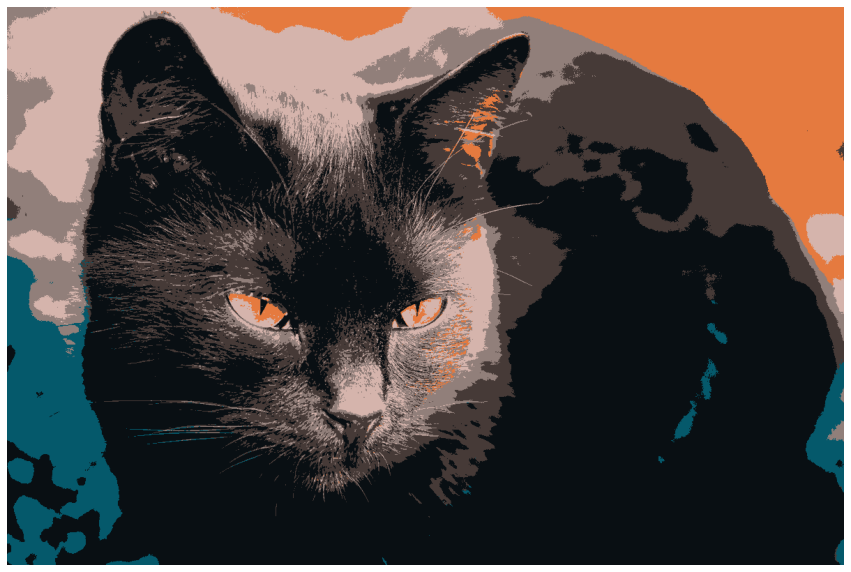

In [42]:
plt.figure(figsize=(15, 15))
plt.imshow(end_img)
plt.axis('off')

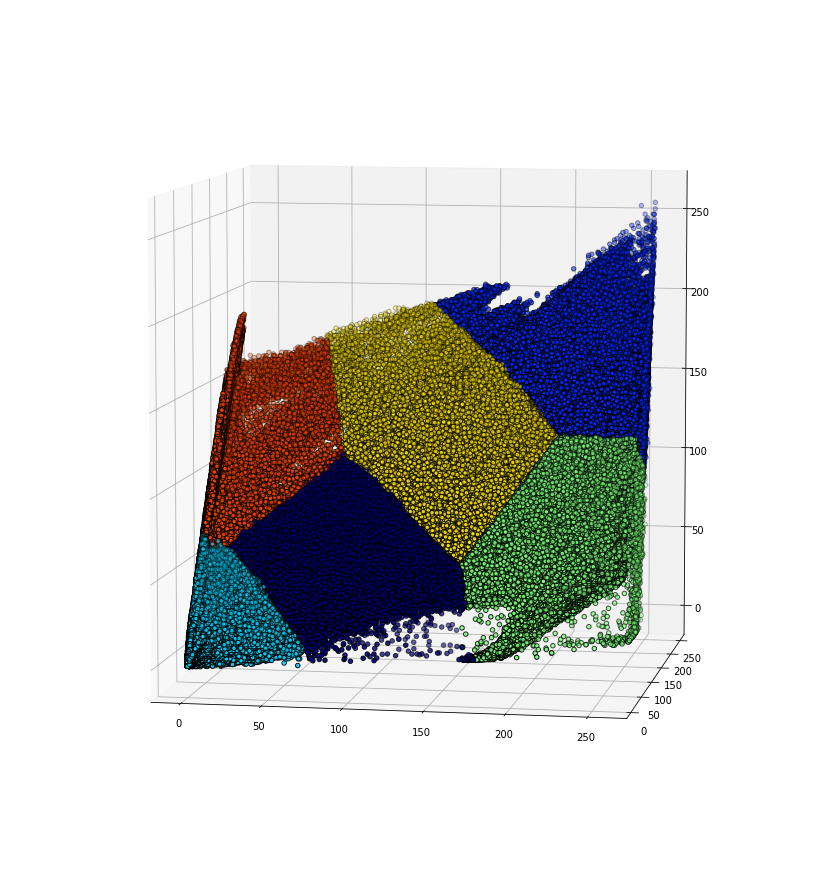

In [43]:
label = clt.labels_

fig1 = plt.figure(figsize=(12, 12))
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        img[label == l, 0],
        img[label == l, 1],
        img[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

In [44]:
255**3

16581375